# **Exploratory Data Analysis**

In [2]:
import missingno as msno
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import statsmodels.api as sm
import yaml
from scipy import stats
from scipy.stats import normaltest
from statsmodels.graphics.gofplots import qqplot
from sqlalchemy import create_engine
from sqlalchemy import inspect
from matplotlib import pyplot as plt

In [3]:
from db_utils import RDSDatabaseConnector
from db_utils import credentials_reader
from dataframe_info import DataFrameInfo
from DataTransformation import DataTransform
from plot import Plotter
from plot import DataFrameTransform

/Users/joeybest/Ai Core/EDA/exploratory-data-analysis---customer-loans-in-finance334/DataTransformation.py:116: SyntaxWarning: invalid escape sequence '\d'
  '''
/Users/joeybest/Ai Core/EDA/exploratory-data-analysis---customer-loans-in-finance334/DataTransformation.py:126: SyntaxWarning: invalid escape sequence '\d'
  self.df_info[col] = self.df_info[col].str.extract('(\d+)')


## Accessing the Dataframe

In [166]:
# reads credentials from yaml file
credentials = credentials_reader()

RDSDatabaseConnector(credentials)
# next creates instance of the rds connector
loan_data = RDSDatabaseConnector(credentials)
loan_data.initiate_engine()
loan_data.database_to_dataframe()

extracted_data_frame = loan_data.database_to_dataframe()

loan_data.saves_data_locally()
# saves CSV file

table_of_loans = loan_data.load_localdata_to_dataframe()
print(table_of_loans)

['loan_payments']
          member_id  loan_amount  funded_amount  funded_amount_inv       term  \
id                                                                              
38676116   41461848         8000         8000.0             8000.0  36 months   
38656203   41440010        13200        13200.0            13200.0  36 months   
38656154   41439961        16000        16000.0            16000.0  36 months   
38656128   41439934        15000        15000.0            15000.0  36 months   
38656121   41439927        15000        15000.0            15000.0  36 months   
...             ...          ...            ...                ...        ...   
76597         76583         5000         5000.0             1775.0  36 months   
142608        74724         5000         5000.0             2350.0  36 months   
117045        70978         3500         3500.0             2225.0  36 months   
88854         70699         5000         5000.0              225.0  36 months   
72323     

## Investigating the current data

In [154]:
print(table_of_loans.head(10))
print(table_of_loans.tail(10))

          member_id  loan_amount  funded_amount  funded_amount_inv       term  \
id                                                                              
38676116   41461848         8000         8000.0             8000.0  36 months   
38656203   41440010        13200        13200.0            13200.0  36 months   
38656154   41439961        16000        16000.0            16000.0  36 months   
38656128   41439934        15000        15000.0            15000.0  36 months   
38656121   41439927        15000        15000.0            15000.0  36 months   
38656111   41439917         2525         2525.0             2525.0  36 months   
38656110   41439916         6675         6675.0             6675.0        NaN   
38656067   41439872        26500        26500.0            26200.0        NaN   
38656063   41439868        10000        10000.0            10000.0  60 months   
38656052   41439857        10000            NaN            10000.0  36 months   

          int_rate  instalm

In [155]:
print(table_of_loans.info())

<class 'pandas.core.frame.DataFrame'>
Index: 54231 entries, 38676116 to 72323
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   member_id                    54231 non-null  int64  
 1   loan_amount                  54231 non-null  int64  
 2   funded_amount                51224 non-null  float64
 3   funded_amount_inv            54231 non-null  float64
 4   term                         49459 non-null  object 
 5   int_rate                     49062 non-null  float64
 6   instalment                   54231 non-null  float64
 7   grade                        54231 non-null  object 
 8   sub_grade                    54231 non-null  object 
 9   employment_length            52113 non-null  object 
 10  home_ownership               54231 non-null  object 
 11  annual_inc                   54231 non-null  float64
 12  verification_status          54231 non-null  object 
 13  issue_date    

In [156]:
print(table_of_loans.describe())

          member_id   loan_amount  funded_amount  funded_amount_inv  \
count  5.423100e+04  54231.000000   51224.000000       54231.000000   
mean   8.655350e+06  13333.076100   13229.509117       12952.622979   
std    1.031281e+07   8082.196709    8019.017599        8099.473527   
min    7.069400e+04    500.000000     500.000000           0.000000   
25%    9.587720e+05   7000.000000    7000.000000        6700.000000   
50%    8.709873e+06  12000.000000   12000.000000       11300.000000   
75%    1.052714e+07  18000.000000   18000.000000       18000.000000   
max    4.146185e+07  35000.000000   35000.000000       35000.000000   

           int_rate    instalment    annual_inc           dti   delinq_2yrs  \
count  49062.000000  54231.000000  5.423100e+04  54231.000000  54231.000000   
mean      13.507328    400.013953  7.222085e+04     15.867087      0.241799   
std        4.392893    238.920012  5.158934e+04      7.623124      0.706706   
min        5.420000     15.670000  3.300000e

In [157]:
print(f"std loan_amount = {table_of_loans['loan_amount'].std()}, mean loan_amount = {table_of_loans['loan_amount'].mean()}")
print(f"Max loan: {table_of_loans['loan_amount'].max()}, Min loan:{table_of_loans['loan_amount'].min()}")

std loan_amount = 8082.196709213126, mean loan_amount = 13333.076100385388
Max loan: 35000, Min loan:500


# Exploring the data

In [4]:
table_of_loans = pd.read_csv('eda.csv')

In [5]:
df_df = DataFrameInfo(table_of_loans)

In [160]:
print(df_df.check_column_datatypes())
print('')
df_df.num_of_nulls()


id                               int64
member_id                        int64
loan_amount                      int64
funded_amount                  float64
funded_amount_inv              float64
term                            object
int_rate                       float64
instalment                     float64
grade                           object
sub_grade                       object
employment_length               object
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_date                      object
loan_status                     object
payment_plan                    object
purpose                         object
dti                            float64
delinq_2yrs                      int64
earliest_credit_line            object
inq_last_6mths                   int64
mths_since_last_delinq         float64
mths_since_last_record         float64
open_accounts                    int64
total_accounts           

,column,count,% null count
0,id,54231,0.000000
1,member_id,54231,0.000000
2,loan_amount,54231,0.000000
3,funded_amount,51224,5.544799
4,funded_amount_inv,54231,0.000000
5,term,49459,8.799395
6,int_rate,49062,9.531449
7,instalment,54231,0.000000
8,grade,54231,0.000000
9,sub_grade,54231,0.000000


In [161]:
print(f"The no. of Unique Items in {df_df.count_unique_categories(['grade'])}")
print('')
print(df_df.extract_statistical_values(['loan_amount']))
print(' ')
df_df.shape_of_dataframe()

The no. of Unique Items in grade    7
dtype: int64

Statistics for Col: loan_amount
count    54231.000000
mean     13333.076100
std       8082.196709
min        500.000000
25%       7000.000000
50%      12000.000000
75%      18000.000000
max      35000.000000
Name: loan_amount, dtype: float64
 
Shape of DataFrame: [54231 rows x 43 columns]



# Transforming pt 1

### The below explains the transformation for the Transform code that follows:

- to_boolean: transforms 'n' to false and y to true in the payment plan column (prints [True] as the only unique value in the dataframe column)

- to_object: The columns in the to_object list created above are converted to objects as their numerical value doesn't impact the loan data information

- to_category: uses a list of columns and transforms them into catagories

- string_to_dates: Transforms the column string in the string_month_and_year list to a datetime format YearMonth

- extract_integer_from_string: extracts any intergers found in a string

- to_numerical_column: converts integers to numerical values

- drop_column: Uses the drop_cols list to remove columns from the data

- to_interger: Converts values to integers

- to_rounded_float: rounds float values to 2 d.p.

- save_transformed_data: saves a transformed version of the data

### Deciding what to drop
1. funded_amount is missing some data but contains the same data as funded_amount_inv, so we can drop it
1. out_prncp_inv contains the same data as out_prncp, so we can drop it
1. total_payment_inv contains the same data as total_payment, so we can drop it
1. application_type and policy_code are the same for everyone and doesn't provide us with much info


In [6]:
Transform = DataTransform(table_of_loans)

In [7]:
Transform.to_boolean('payment_plan')

to_object_columns = ['id', 'member_id', 'policy_code']
Transform.to_object(to_object_columns)

convert_categories = ['grade', 'sub_grade', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'employment_length']
Transform.to_category(convert_categories)

string_month_and_year = ['last_credit_pull_date', 'next_payment_date', 'last_payment_date', 'earliest_credit_line', 'issue_date']
Transform.strings_to_dates(string_month_and_year)

string_numbers = ['term']
Transform.extract_integer_from_string(string_numbers)

numericals = ['term', 'mths_since_last_record', 'mths_since_last_major_derog', 'mths_since_last_delinq', 'mths_since_last_record']
Transform.to_numerical_column(numericals)

drop_cols = ['funded_amount', 'application_type', 'policy_code', 'out_prncp_inv', 'total_payment_inv']
Transform.drop_column(drop_cols)

int_numbers = ['loan_amount', 'funded_amount_inv', 'annual_inc', 'term', 'open_accounts', 'total_accounts', 'collections_12_mths_ex_med', 'mths_since_last_delinq', 'mths_since_last_major_derog']
Transform.to_interger(int_numbers)

Transform.to_rounded_float('collection_recovery_fee', 2)

Transform.save_full_data('full_loan_data.csv')

[ True]


# Transforming pt 2

In [8]:
table_of_loans = pd.read_csv('full_loan_data.csv')
df_cols = DataFrameTransform(table_of_loans)

In [17]:
plot = Plotter(table_of_loans)

#### Here we want to visualise the number of null values and the correct them via imputation or dropping. Then we can re-visualise the data.

In [12]:
print(df_cols.num_of_nulls())

                        column  count  % null count
0                           id  54151           0.0
1                    member_id  54151           0.0
2                  loan_amount  54151           0.0
3            funded_amount_inv  54151           0.0
4                         term  54151           0.0
5                     int_rate  54151           0.0
6                   instalment  54151           0.0
7                        grade  54151           0.0
8                    sub_grade  54151           0.0
9            employment_length  54151           0.0
10              home_ownership  54151           0.0
11                  annual_inc  54151           0.0
12         verification_status  54151           0.0
13                  issue_date  54151           0.0
14                 loan_status  54151           0.0
15                payment_plan  54151           0.0
16                     purpose  54151           0.0
17                         dti  54151           0.0
18          

In [11]:
df_cols.impute_zeros(['employment_length'])
df_cols.impute_median(['int_rate'])
df_cols.drop_null_rows(['last_payment_date', 'last_credit_pull_date'])
df_cols.drop_column(['mths_since_last_delinq', 'next_payment_date', 'mths_since_last_record', 'mths_since_last_major_derog'])

- Missing values in employment_length can be assumed to be unemployment

- Missing values in int_rate may be needed so we impute to median values as it is less affected by outliers than mean

- Data missing in last_payment_date and last_credit_pull_date is too small to impact much, so we remove the rows

- Data missing from 57%-88%, so drop column (mths_since_last_delinq, next_payment_date, mths_since_last_record & mths_since_last_major_derog)


ValueError: keyword grid_b is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'labelfontfamily', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_data', 'grid_drawstyle', 'grid_figure', 'grid_fillstyle', 'grid_gapcolor', 'grid_gid', 'grid_in_layout', 'grid_label', 'grid_linestyle', 'grid_linewidth', 'grid_marker', 'grid_markeredgecolor', 'grid_markeredgewidth', 'grid_markerfacecolor', 'grid_markerfacecoloralt', 'grid_markersize', 'grid_markevery', 'grid_mouseover', 'grid_path_effects', 'grid_picker', 'grid_pickradius', 'grid_rasterized', 'grid_sketch_params', 'grid_snap', 'grid_solid_capstyle', 'grid_solid_joinstyle', 'grid_transform', 'grid_url', 'grid_visible', 'grid_xdata', 'grid_ydata', 'grid_zorder', 'grid_aa', 'grid_c', 'grid_ds', 'grid_ls', 'grid_lw', 'grid_mec', 'grid_mew', 'grid_mfc', 'grid_mfcalt', 'grid_ms']

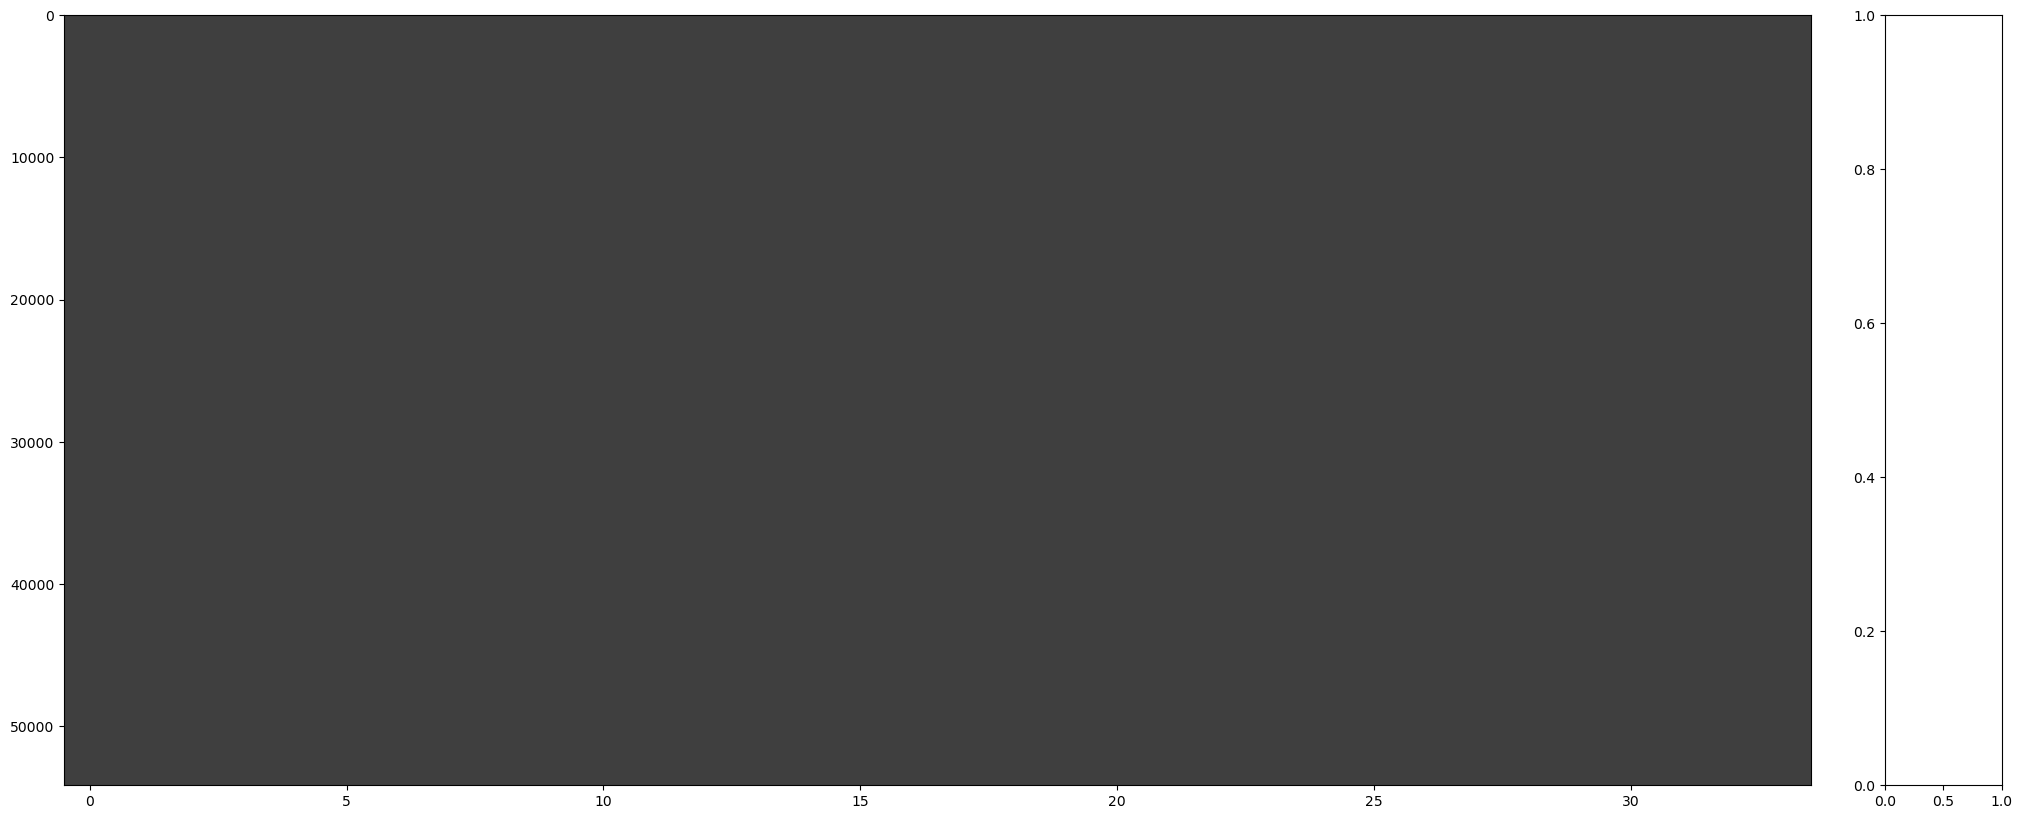

In [18]:
plot.show_missing_nulls()

#### Save a version of data to use after the Outlier stage / Milestone 4 later on

In [14]:
df_cols.save_untransformed_data('untransformed_loan_data.csv')

In [15]:
# testing int_rate
int_rate_data = table_of_loans['int_rate']

# D’Agostino’s K^2 Test
stat, p = normaltest(int_rate_data, nan_policy='omit')
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=1724.538, p=0.000


## Visualising the Data
#### This will allow us to loook for skews

In [19]:
plot.multi_plot('total_payment')

NameError: name 'table_of_loans' is not defined

In [152]:
plot.multi_plot('funded_amount_inv')

NameError: name 'table_of_loans' is not defined

In [20]:
plot.multi_plot('instalment')

NameError: name 'table_of_loans' is not defined

In [ ]:
plot.multi_plot('loan_amount')

In [ ]:
plot.multi_plot('int_rate')

- total_payments has a positive skew

- funded_amount_inv had normal distribution

- instalment is slightly skewed but close to a normal distribution

- loan_amount has a slight positive skew

- int_rate has normal distribution, mean and median are very similar (median imputation is valid)

### Skewness with and without transformations

#### Columns with a positive skew distribution and dont need transformation include:
1. int_rate Skewness: 0.45661978102982004, with logtransformation= -0.38 and with boxcox transformation = 0.46

In [ ]:
# skew data
# normal skew?
# Skew of int_rate column is 0.45661978102982004/// logt= -0.38/// boxcox = 0.46
# Skew of total_accounts column is 0.7790400286166349/// logt= -0.68/// boxcox = 0.78
# Skew of loan_amount column is 0.8049220181025606/// logt= -0.68/// boxcox = 0.80
# Skew of funded_amount_inv column is 0.8133743608921553/// logt= -3.33/// boxcox = 0.81
# Skew of dti column is 0.18910057534680505/// logt= -1.98/// boxcox = 0.19

# positive skew:
# Skew of instalment column is 0.9965721690437305/// logt= -0.67/// # ? boxcox = 1
# Skew of open_accounts column is 1.0591835802494733/// logt= -0.47/// # boxcox = 1.06
# Skew of total_rec_prncp column is 1.2626785390807123/// logt= -0.92/// # boxcox = 1.26
# Skew of total_payment column is 1.2698752968451772/// logt= -0.75/// # boxcox = 1.27
# Skew of total_rec_int column is 2.2045848938701638/// logt= -0.56/// # boxcox = 2.20
# Skew of out_prncp column is 2.35405079479137/// logt=0.57/// # boxcox = 2.35
# Skew of last_payment_amount column is 2.4972203995928135/// logt=0.13/// # boxcox = 2.50
# Skew of inq_last_6mths column is 3.253522804381087/// logt=1.97///# boxcox = 3.25
# Skew of delinq_2yrs column is 5.376384516017939 /// # logt=5.42/// boxcox = 5.38
# Skew of annual_inc column is 8.717499091755876/// logt= 0.14/// # boxcox = 8.72
# Skew of total_rec_late_fee column is 13.174553220535644/// logt=5.51///# boxcox = 13.17
# Skew of recoveries column is 14.389298686317593/// logt=3.82/// # boxcox = 14.39
# Skew of collections_12_mths_ex_med column is 20.307695011511576/// # logt=65.06/// boxcox = 20.31
# Skew of collection_recovery_fee column is 27.807756579876514/// logt=5.41/// # boxcox = 27.81

In [ ]:
logt_cols = ['annual_inc', 'total_accounts', 'open_accounts', 'last_payment_amount']
df_cols.log_transform(logt_cols)

In [ ]:
boxcox_cols = ['loan_amount', 'instalment', 'int_rate', 'dti', 'funded_amount_inv', 'total_payment']
df_cols.box_cox_transform(boxcox_cols)

In [ ]:
# code below saves file, but its already saved
df_cols.save_transformed_data('transformed_loan_data.csv')

# Outlier Stage

In [ ]:
transformed_loans = pd.read_csv('transformed_loan_data.csv')
df_cols = DataFrameTransform(transformed_loans)
plot = Plotter(transformed_loans)

In [ ]:
numerical_cols = ['loan_amount','funded_amount_inv', 'int_rate', 'instalment', 'dti', 'annual_inc', 'total_payment', 'total_accounts', 'open_accounts', 'last_payment_amount']
plot.multi_hist_plot(numerical_cols)

In [ ]:
plot.multi_qq_plot(numerical_cols)

In [ ]:
# boxplot of 
plot.show_outliers()

In [ ]:
plot.boxplot(numerical_cols)

In [ ]:
filtered_df = df_cols.remove_outliers_iqr_dataframe(column= numerical_cols, threshold=1.5)
plot.show_outliers_after_removal(dataframe=filtered_df, columns=numerical_cols)

In [ ]:
df_without_outliers = DataFrameTransform(filtered_df)
plot_without_outliers = Plotter(filtered_df)
Transform = DataTransform(filtered_df)

In [ ]:
plot_without_outliers.boxplot(numerical_cols)


In [ ]:
plot_without_outliers.multi_hist_plot(numerical_cols)

In [ ]:
plot_without_outliers.show_missing_nulls()
# removing the outliers has left NAN values, so we will either transform or remove the rows

In [ ]:
df_without_outliers.num_of_nulls()
# values are all very low, impute with the mean!

In [ ]:
# Outliers: If a column has noticeable outliers, the median is more robust and less influenced by extreme values.
to_be_median_imputed = ['loan_amount', 'funded_amount_inv',  'int_rate', 'instalment', 'annual_inc', 'open_accounts', 'total_accounts', 'total_payment', 'last_payment_amount']
df_without_outliers.impute_median(to_be_median_imputed)

In [ ]:
df_without_outliers.num_of_nulls()
plot_without_outliers.show_missing_nulls()

In [ ]:
plot_without_outliers.multi_qq_plot(numerical_cols)

In [ ]:
plot_without_outliers.heatmap(numerical_cols)

In [ ]:
## Threshold for highly correlated columns is 0.85

# Multi-linearity between 'loan_amount', 'instalment' & 'funded_amount_inv'

# funded_amount_inv and loan_amount corrolation = 0.96
# instalmannt and loan_amount corrolation = 0.96
# instalmannt and funded_amount_inv corrolation = 0.93
    # desptie columns being past the threshold, they're all important for the analysis stage, so we wont be dropping any of them!

# total_payment is highly corrolated with loan_amount, funded_amount_inv and instalment too, but only at 0.81, 0.78 and 0.81 respectively
# therefore not passed the 0.85 threshold

In [ ]:
df_cols.save_transformed_data('filtered_loan_data.csv')
# saves data without any outliers

# Milestone 4

## Current state of the Loans

In [ ]:
filtered_df = pd.read_csv('untransformed_loan_data.csv')
# untransformed data, specifically for milestone 4
df_without_outliers = DataFrameTransform(filtered_df)
plot_without_outliers = Plotter(filtered_df)
Transform = DataTransform(filtered_df)

In [ ]:
filtered_df['term'] = filtered_df['term'].replace(0, 36)
# replaces 0's in term with median value(36)

In [ ]:
# loan recovered (total_payment) againts invstor funding (funded_amount_inv) & total amount funded (loan_amount)
total_amount_funded = filtered_df['loan_amount'].sum()
print(f' Total loan amount funded is {total_amount_funded}')
invstor_funding = filtered_df['funded_amount_inv'].sum()
print(f' Total amount invested is {invstor_funding}')
total_payment_sum = filtered_df['total_payment'].sum()
print(f' Total payment recovered is {total_payment_sum}')

In [ ]:
#together and rounded
totals = round(filtered_df[['loan_amount', 'funded_amount_inv', 'total_payment']].sum(), 0)
totals

In [ ]:
# % of loans recovered
print(f'Percentage of the loans recovered against the investor_funding is {(total_payment_sum/invstor_funding)*100}')
print(f'Percentage of the loans recovered against the total_amount_funded is {(total_payment_sum/total_amount_funded)*100}')

per_of__inv_loan_recovered = round((total_payment_sum/invstor_funding)*100, 2)
per_of__total_loan_recovered = round((total_payment_sum/total_amount_funded)*100, 2)
print(f' {per_of__inv_loan_recovered}%')
print(f' {per_of__total_loan_recovered}%')

In [ ]:
data = {
'funded_amount_inv': (filtered_df['total_payment'].sum()/invstor_funding)*100,
'loan_amount': (filtered_df['total_payment'].sum()/total_amount_funded)*100
}

plot_without_outliers.bar(data)

In [ ]:
# Calculate percentage of investor funding recovered
pct_invetor_rec = round(100 * totals.total_payment/totals.funded_amount_inv, 2)
# Calculate percentage of funded amount recovered
pct_total_rec = round(100 * totals.total_payment/totals.loan_amount, 2) 

In [ ]:
data = {'Funding': ['Investor', 'Total'],
            'Percent': [pct_invetor_rec, pct_total_rec]}

# Create a Pandas DataFrame
df = pd.DataFrame(data)
display(df)

df.plot(x="Funding", y="Percent", kind="bar", ylabel="% Recovered") 

In [ ]:
df.plot(y="Percent", kind="pie", ylabel="% Recovered", labels=df['Funding'], startangle=90, xlabel='Funding')
# Add a title and xlabel
plt.title("Recovery Percentage by Funding Source")
plt.legend(title="Funding Source")
# Display the chart
plt.show()

In [ ]:
remaining_amount = round(total_amount_funded - total_payment_sum, 2)
remaining_amount
# whats left to be paid overall

In [ ]:
# Creating a DataFrame with the recovered and remaining amounts
data = {'Amount': [total_payment_sum, remaining_amount]}
df = pd.DataFrame(data, index=['Recovered', 'Remaining'])

# Plotting the pie chart
df.plot(y='Amount', kind='pie', autopct='%1.1f%%', startangle=90)
# Adding a title and legend title
plt.title("Percentage of Amount Recovered")
plt.legend(title="Key")
# Displaying the chart
plt.show()

In [ ]:
# sum of the total_payment and the instalment and multiply this by 6. 
# Then divide this by the sum of the funded amount inv. 
# times By 100 to get this as a percentage

six_month_projection = round((filtered_df["total_payment"].sum()+(filtered_df["instalment"].sum()*6))/(filtered_df["funded_amount_inv"].sum())*100, 2)

In [ ]:
data = {'Funding': ['Total'],
        'Percent': [six_month_projection]}

# Create a Pandas DataFrame
df = pd.DataFrame(data)
display(df)

df.plot(x="Funding", y="Percent", kind="bar", ylabel="% Recovered") 

In [ ]:
# Filter the DataFrame to include only charged off loans
charged_off_loans = filtered_df[filtered_df['loan_status'] == 'Charged Off']

# Calculate the percentage of charged off loans
charged_off_percentage = (charged_off_loans.shape[0] / filtered_df.shape[0]) * 100

# Calculate the total amount paid towards charged off loans
total_payment_charged_off = charged_off_loans['total_payment'].sum()

In [ ]:
print(f"Percentage of charged off loans: {charged_off_percentage:.2f}%")
print(f"Total amount paid towards charged off loans: {total_payment_charged_off:.2f}")

In [ ]:
charged_off_loans_loan_amount_sum = round(charged_off_loans['loan_amount'].sum(),2)
print(f' Total amount to be paid: {charged_off_loans_loan_amount_sum}')

charged_off_loans_total_payment_sum = round(charged_off_loans['total_payment'].sum(),2)
print(f' Total that has been paid: {charged_off_loans_total_payment_sum}')

charged_off_loans_loss = round(charged_off_loans_loan_amount_sum - charged_off_loans_total_payment_sum, 2)
print(f' Total that has been lost: {charged_off_loans_loss}')

In [ ]:
data = {'Paid': [charged_off_loans_total_payment_sum],
        'Loss': [charged_off_loans_loss]}

df = pd.DataFrame(data)
display(df)

In [ ]:
# Creating a pie chart
labels = ['Paid', 'Loss']
sizes = [charged_off_loans_total_payment_sum, charged_off_loans_loss]
colors = ['#1f77b4', '#ff7f0e']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
# Setting the title of the pie chart
plt.title('Paid vs. Loss')
# Displaying the pie chart
plt.show()

In [ ]:
# Creating a pie chart
labels = ['Paid', 'Loss']
sizes = [charged_off_loans_total_payment_sum, charged_off_loans_loss]
colors = ['#1f77b4', '#ff7f0e']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
# Setting the title of the pie chart
plt.title('Paid vs. Loss')
# Adding a legend
plt.legend()
# Displaying the pie chart
plt.show()

In [ ]:
filtered_df['num_of_payments_made'] = filtered_df['total_payment'] / filtered_df['instalment']
filtered_df['months_left_to_pay'] = filtered_df['term'] - filtered_df['num_of_payments_made']

In [ ]:
# Filtering the DataFrame to include only late loans
risk_loans = filtered_df[(filtered_df['loan_status'] == 'Late (31-120 days)') | (filtered_df['loan_status'] == 'Late (16-30 days)')]
# Calculating the percentage of risk loans
risk_percentage = round((risk_loans.shape[0] / filtered_df.shape[0]) * 100, 2)
# Calculating the total amount paid towards charged off loans
total_customers_in_risk_bracket = round(risk_loans.shape[0],0)
print(f"Percentage of risk loans: {risk_percentage}%")
print(f"Total number of customers in risk bracket: {total_customers_in_risk_bracket}")

In [ ]:
risk_loans_loan_amount_sum = round(risk_loans['loan_amount'].sum(),2)
# print(f' Total amount to be paid: {risk_loans_loan_amount_sum}')
risk_loans_total_payment_sum = round(risk_loans['total_payment'].sum(),2)
# print(f' Total that has been paid: {risk_loans_total_payment_sum}')
risk_loans_loss = round(risk_loans_loan_amount_sum - risk_loans_total_payment_sum, 2)
print(f'Total still to be paid (exclusive of int_rate): {risk_loans_loss}')
# print(f'Percentage: {round((risk_loans_loss/risk_loans_loan_amount_sum)*100,2)}%')

In [ ]:
risk_amount_left_to_pay_ = risk_loans['months_left_to_pay'] * risk_loans['instalment']
projected_loss = round(risk_amount_left_to_pay_.sum(), 2)
print(f"Projected Loss if Switched to Charged Off: ${projected_loss}")

In [ ]:
risk_charged_off_rev_pct = risk_percentage + charged_off_percentage 
print(f'Percentage of late and charged off revenue: {risk_charged_off_rev_pct:.2f}%')

In [ ]:
# compare grade, purpose and home_ownership with 
# customers who have already stopped paying 
# and 
# customers who are currently behind on payments.

# im also going to investigate employment_length, sub_grade, annual_inc and open_accounts

# Does the grade of the loan have effect on customers not paying?
# Is the purpose for the loan likely to have an effect?
# Does the home_ownership value contribute to the likelihood a customer won't pay?


In [ ]:
paid_loans = filtered_df[(filtered_df['loan_status'] == 'Fully Paid')]
on_time_loans = filtered_df[(filtered_df['loan_status'] == 'Current')]
grace_period_loans = filtered_df[(filtered_df['loan_status'] == 'In Grace Period')]

In [ ]:
data = {'Paid Grades': paid_loans['grade'].value_counts(),
        # 'On Time Grades': on_time_loans['grade'].value_counts(),
        # 'Grace Period Grades': grace_period_loans['grade'].value_counts(),
        'Risk Loan Grades': risk_loans['grade'].value_counts(),
        'Charged Off Grades': charged_off_loans['grade'].value_counts()
        }

df = pd.DataFrame(data)

for index, row in df.iterrows():
    print(f"Paid Loans {index} Grade: {row['Paid Grades']}")
    # print(f"On time {index} Grades: {row['On Time Grades']}")
    # print(f"Grace Period {index} Grades: {row['Grace Period Grades']}")
    print(f"Risk Loan {index} Grades: {row['Risk Loan Grades']}")
    print(f"Charged Off Loan {index} Grades: {row['Charged Off Grades']}") 

df.plot(kind='bar', stacked=True)

plt.title('Counts of Grades')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.legend()
# Displaying the plot
plt.show()

In [ ]:
data = {'Paid sub grade': paid_loans['sub_grade'].value_counts(),
        # 'On Time sub grade': on_time_loans['sub_grade'].value_counts(),
        # 'Grace Period sub grade': grace_period_loans['sub_grade'].value_counts(),
        'Risk Loan sub grade': risk_loans['sub_grade'].value_counts(),
        'Charged Off sub grade': charged_off_loans['sub_grade'].value_counts()
        }

df = pd.DataFrame(data)

for index, row in df.iterrows():
    print(f"Paid Loans sub grade {index}: {row['Paid sub grade']}")
    # print(f"On time sub grade {index}: {row['On Time sub grade']}")
    # print(f"Grace Period sub grade {index}: {row['Grace Period sub grade']}")
    print(f"Risk Loan sub grade {index}: {row['Risk Loan sub grade']}")
    print(f"Charged Off Loan sub grade {index}: {row['Charged Off sub grade']}")

df = pd.DataFrame(data)

df.plot(kind='bar', stacked=True)

plt.title('Count of Sub Grade')
plt.xlabel('Sub Grades')
plt.ylabel('Count')
plt.legend()
plt.show()

In [ ]:
# next plot
data = {'Paid purpose': paid_loans['purpose'].value_counts(),
        # 'On Time purpose': on_time_loans['purpose'].value_counts(),
        # 'Grace Period purpose': grace_period_loans['purpose'].value_counts(),
        'Risk Loan purpose': risk_loans['purpose'].value_counts(),
        'Charged Off purpose': charged_off_loans['purpose'].value_counts()
        }

df = pd.DataFrame(data)

for index, row in df.iterrows():
    print(f"Paid Loans purpose: {index} {row['Paid purpose']}")
    # print(f"On time purpose: {index} {row['On Time purpose']}")
    # print(f"Grace Period purpose: {index} {row['Grace Period purpose']}")
    print(f"Risk Loan purpose: {index} {row['Risk Loan purpose']}")
    print(f"Charged Off Loan purpose: {index} {row['Charged Off purpose']}")

df.plot(kind='bar', stacked=True)

plt.title('Counts of Purposes')
plt.xlabel('Loan Purpose')
plt.ylabel('Count')
plt.legend()
plt.show()

In [ ]:
# next plot
data = {'Paid home ownership': paid_loans['home_ownership'].value_counts(),
    # 'On Time home ownership': on_time_loans['home_ownership'].value_counts(),
    # 'Grace Period home ownership': grace_period_loans['home_ownership'].value_counts(),
    'Risk Loan home ownership': risk_loans['home_ownership'].value_counts(),
    'Charged Off home ownership': charged_off_loans['home_ownership'].value_counts()
    }
df = pd.DataFrame(data)

for index, row in df.iterrows():
    print(f"Paid Loans home ownership: {index} {row['Paid home ownership']}")
    # print(f"On time home ownership: {index} {row['On Time home ownership']}")
    # print(f"Grace Period home ownership: {index} {row['Grace Period home ownership']}")
    print(f"Risk Loan home ownership: {index} {row['Risk Loan home ownership']}")
    print(f"Charged Off Loan home ownership: {index} {row['Charged Off home ownership']}")

df.plot(kind='bar', stacked=True)

plt.title('Counts of Home Ownership Status')
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.legend()
plt.show()

In [ ]:
# next plot 
data = {'Paid employment length': paid_loans['employment_length'].value_counts(),
    # 'On Time employment length': on_time_loans['employment_length'].value_counts(),
    # 'Grace Period employment length': grace_period_loans['employment_length'].value_counts(),
    'Risk Loan employment length': risk_loans['employment_length'].value_counts(),
    'Charged Off employment length': charged_off_loans['employment_length'].value_counts()
    }

df = pd.DataFrame(data)

for index, row in df.iterrows():
    print(f"Paid Loans employment length {index}: {row['Paid employment length']}")
    # print(f"On time employment length {index}: {row['On Time employment length']}")
    # print(f"Grace Period employment length {index}: {row['Grace Period employment length']}")
    print(f"Risk Loan employment length {index}: {row['Risk Loan employment length']}")
    print(f"Charged Off Loan employment length {index}: {row['Charged Off employment length']}")

df.plot(kind='bar', stacked=True)

plt.title('Length of Employment')
plt.xlabel('Employment Length')
plt.ylabel('Count')
plt.legend()
plt.show()

In [ ]:
# next plot
data = {
'Paid annual income': paid_loans['annual_inc'],
'Risk Loan annual income': risk_loans['annual_inc'],
'Charged Off annual income': charged_off_loans['annual_inc']
}

df = pd.DataFrame(data)

# Print the counts for each loan category
for column in df.columns:
    counts = df[column].value_counts()
    print(f"{column} counts:")
    print(counts)
    print()

# Plotting histogram-density plots using seaborn
for column in df.columns:
    plt.figure(figsize=(10, 6))  # Set the figure size as needed
    plt.subplot(1, 2, 1)
    sns.histplot(df[column], kde=True)
    plt.title(f"Histogram-Density Plot - {column}")
    plt.xlabel("Annual Income")
    plt.ylabel("Density")
    plt.xlim(0, 700000)  # Adjust the x-axis limits as needed

    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[column])
    plt.title(f"Box Plot - {column}")
    plt.ylabel("Annual Income")

    # Customising y-axis tick labels
    plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
    plt.tight_layout()  # Adjust the spacing between subplots
    plt.show()

In [ ]:
# different view of box plots for annual_inc

data = {'Paid annual income': paid_loans['annual_inc'].value_counts(),
        # 'On Time annual income': on_time_loans['annual_inc'].value_counts(),
        # 'Grace Period annual income': grace_period_loans['annual_inc'].value_counts(),
        'Risk Loan annual income': risk_loans['annual_inc'].value_counts(),
        'Charged Off annual income': charged_off_loans['annual_inc'].value_counts()
        }

df = pd.DataFrame(data)

for index, row in df.iterrows():
    print(f"Paid Loans annual income {index}: {row['Paid annual income']}")
    # print(f"On time annual income {index}: {row['On Time annual income']}")
    # print(f"Grace Period annual income {index}: {row['Grace Period annual income']}")
    print(f"Risk Loan annual income {index}: {row['Risk Loan annual income']}")
    print(f"Charged Off Loan annual income {index}: {row['Charged Off annual income']}")

df = pd.DataFrame(data)

# Plotting the box plot
df.boxplot()
plt.title('Distribution of Annual Income')
plt.ylabel('Annual Income')
plt.xticks(rotation=45)

In [ ]:
# another view
data = {
    'Paid annual income': paid_loans['annual_inc'],
    'Risk Loan annual income': risk_loans['annual_inc'],
    'Charged Off annual income': charged_off_loans['annual_inc']
}

df = pd.DataFrame(data)

# Print the counts for each loan category
for column in df.columns:
    counts = df[column].value_counts()
    print(f"{column} counts:")
    print(counts)
    print()

df.boxplot()

# Customizing the plot
plt.title('Distribution of Annual Income')
plt.ylabel('Annual Income')
plt.xticks(rotation=45)

plt.show()

In [ ]:
# %%
# Summary:

# Grade / Sub Grade:
# Those with a higher Grade or Sub grade were more likely to pay back the full loan, than those with lower grades
# As the grade decends from 'A', there is a decrease in fully paid loans and an increase in risk and charged off loans between 'B1-E2'.
# Thus, the lower the grade the more risky the loan becomes.

# Annual Income:
# in comparison to the paid loans, charged off and risk loans are drastically smaller
# Thus indicating that a higher income is suggestive of being able to pay the full loan back
# And smaller annual incomes are suggestive of needing more time/assistance or likely to be charged off 

# Purpose:
# debt_consolidation Has a significant increase within the risk and charged off loans as a the primary/majority purpose for their loans
# The majority of paid loans was for this purpose too
# Meaning purpose alone may not directly be linked to likelyhood to be able to pay back the loans, an analysis of all indicators would need to be observed
# Other than that small businesses and credit_card purposes also poses a strong likelyhood of being charged off

# Home Ownership:
# Morgage owners are very likly to be able to pay the full loan
# Renters are slightly more likely to be charged off, but are still hold a good place for repaying their loans in full
# however, people who own their property seem to be not as likely as the previous two to pay the loan in full
# but there is less data on that point
# so in summary people who rent their property should be accepted with some caution 

# Employment Length:
# The largest amount of paid, charged off and risk loans all come frome people who have been in employment for 10 years+
# But the paid loans are significantly higher, suggesting that people in long term employment are more likely to pay their loans in full.
# However, ignoring the 10years+ most of the columns seem largely similar
# This could suggest that employment length doesnt have a significant impact on ability to repay loans
# but it should still be noted that people who have worked less than a year have the 2nd largest amount of charged off loans after the 10years+
